# A visual guide to line searches

Here we go through a visual on line-searches. Both for functions with a scalar output and with a vector output.

In both cases, we have an N-dimensional input space, and we want to evaluate the functions along a line (possibly along with its derivative). In that case we define a line as $\vec{r} = \vec{x}_0 + \alpha \vec{d}$, where $\vec{x}_0 $ is some point in the N-dimensional input space, $\vec{d}$ is a vector denoting the direction of the line, and $\alpha$ is some real number, such that we can get all points $\vec{r}$ along the line.

For this notebook we will focus on N=2, as this is the easiest case to visualize, but the functions should work for any size or shape of input. Further, I'd advise to use regular Jupyter Notebooks, as this will allow you to interact with the 3D plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print('numpy version: ', np.__version__)
print('matplotlib version: ', matplotlib.__version__)

# Some stuff we will need for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# We need to pass this dictionary to all subplots we create, so the axes becomes 3D
plot_dict = dict(projection='3d')


numpy version:  1.24.4
matplotlib version:  3.6.3


In [2]:
# Enable interactive 3D-plotting
# requires `pip install ipympl`

# In jupyter-lab>=4
%matplotlib widget

First we make the general line-search function using closure. This function will take in a function F, a point x0 and a direction d, and then output a function which evaluates the function F on the line x0+alpha*d.

In [3]:
def line_function(F, x0, d):
    """
    Returns a function, F_restricted, which calculates F along the line defined
    by x0+alpha*d.
    """
    def F_restricted(alpha):
        # A line through space
        line = x0 + alpha*d
        # Calculate F along the line
        return F(line)
    return F_restricted

Let's try it on a function, now!

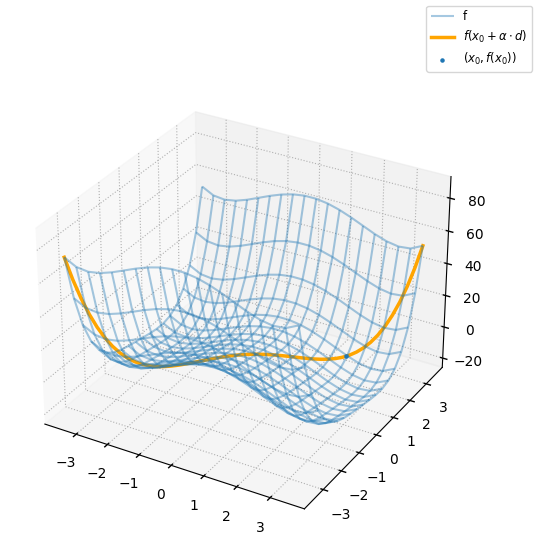

In [4]:
def f(x):
    # Let's do a 2D function: x^4/4 - 4x^2 + y^4/2 - 3y
    return 0.25*x[0]**4-4*x[0]**2 + 0.5*x[1]**4 - 3*x[1]

def gradf(x):
    # And its gradient
    return np.array([x[0]**3 - 8*x[0], 2*x[1]**3 - 3])


max_coord = 3.5
N_points = 20
x = np.linspace(-max_coord, max_coord, N_points)
y = np.linspace(-max_coord, max_coord, N_points)

# Creates a list X, which holds the 2D versions of x and y. Useful for calculating many values of f(x) at the same time
X = np.meshgrid(x, y)


# Let's try x0=[2,2] and d=[-1, 1]
x0 = np.array([2, 2])
d = np.array([1, 1])

# Grab the function for evaluating f along the line
f_along_line = line_function(f, x0, d)

# Create the coordinates
alpha_min = -5.5
alpha_max = 1.5
N_alpha = 50
alpha = np.linspace(alpha_min, alpha_max, N_alpha)

# Now, the line version of the function does not support array programming, so we need to do this in a loop
f_line = np.array([f_along_line(a) for a in alpha])
# This is a list comprehension equivalent to the following code:
# f_line = []
# for a in alpha:
#     f_line.append(f_along_line(a))
# f_line = np.array(f_line)

line = x0[:, np.newaxis] + np.outer(d, alpha)
linewidth = 2.5

# Create a figure and axes object, where the axes is 3D.
fig, ax = plt.subplots(subplot_kw=plot_dict)

# Plot the function as a wireframe
ax.plot_wireframe(X[0], X[1], f(X), alpha=0.4, label='f')

# Plot the function evaluated along the line
ax.plot(line[0], line[1], f_line, c='orange', linewidth=linewidth, label=r'$f(x_0+\alpha \cdot d)$')

# Plot the starting point
ax.scatter(x0[0], x0[1], f(x0), label='$(x_0, f(x_0))$')
fig.legend();

Or in a regular 2D plot with contours, and the line in 1D next to it

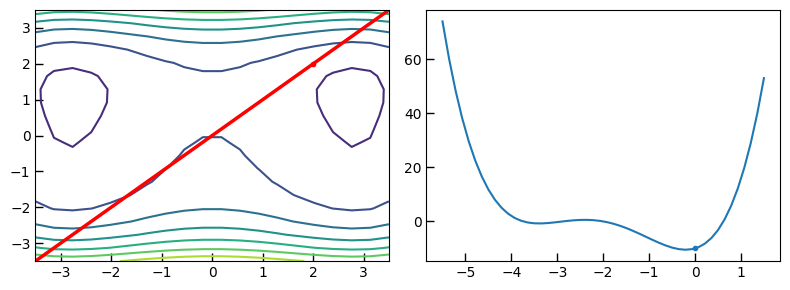

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

# First the contours
ax1.contour(X[0], X[1], f(X))
ax1.plot(line[0], line[1], c='red', linewidth=linewidth)
ax1.scatter(x0[0], x0[1], c='red')

# Then the line itself
ax2.plot(alpha, f_line)
# And the starting point, alpha=0
ax2.scatter([0], f_along_line(0))
fig.tight_layout()

We can also show both the contour and the wireframe together, so we can see the correspondence between the two different plots.

Note especially how the orange line in the plot (the function $f$, evaluated along the line $\vec{x}_0+\alpha\vec{d}$) is just the red line (the line $\vec{x}_0+\alpha\vec{d}$, sitting in the xy-plane), projected upwards onto the function $f$

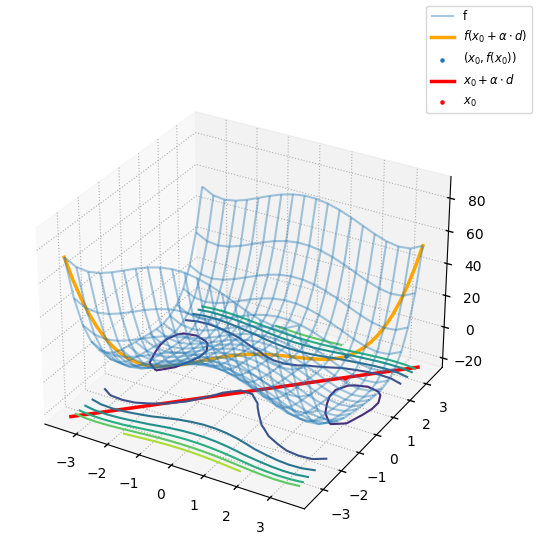

In [6]:
# Create a figure and axes object, where the axes is 3D.
fig, ax = plt.subplots(subplot_kw=plot_dict)

# Plot the function as a wireframe
ax.plot_wireframe(X[0], X[1], f(X), alpha=0.4, label='f')

# Plot the function evaluated along the line
ax.plot(line[0], line[1], f_line, c='orange', linewidth=linewidth, label=r'$f(x_0+\alpha \cdot d)$')

# Plot the starting point
ax.scatter(x0[0], x0[1], f(x0), label='$(x_0, f(x_0))$')


# Plot the contours, line and starting point below the graph, on the bottom pane
# Note how the gray and orange lines coincides when looked at from above.
z_below = ax.get_zlim()[0]
z_above = ax.get_zlim()[1]
ax.plot(line[0], line[1], z_below, c='red', linewidth=linewidth, label=r'$x_0 + \alpha \cdot d$')
ax.scatter(x0[0], x0[1], z_below, c='red', label=r'$x_0$')
ax.contour(X[0], X[1], f(X), zdir='z', offset=z_below)

# Set the limits again, so the lines stay on the bottom pane
ax.set_zlim([z_below, z_above])

fig.legend();

Now, we see that we're actually quite close to the minimum of f along this line. Another way to see this, is to take the derivative of the function, along this line. This is done by taking the directional derivative, which is the inner product between the gradient and the direction, for each value of alpha:

\begin{equation}
    \nabla_{\vec{d}} f(\vec{x_0}+\alpha\vec{d}) = \vec{d} \cdot \nabla f(\vec{x_0}+\alpha\vec{d})
\end{equation}
which is exactly the formula we use to line search along the gradient.

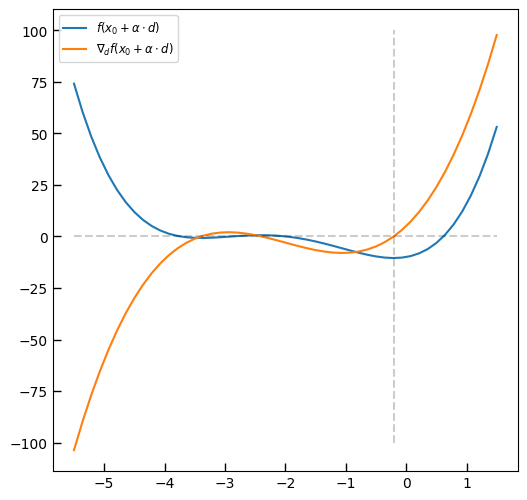

In [7]:
# Grab the function needed
gradf_along_line = line_function(gradf, x0, d)

# Calculate d*gradf along the line, in the same way as above.
gradf_line = np.array([d @ gradf_along_line(a) for a in alpha])

# And here is a function to give us the directional derivative along a line. Similar to line_function, using closure
def multidimensional_line_function(gradf, x0, d):
    gradf_restricted = line_function(gradf, x0, d)
    def directional_derivative(alpha):
        return d @ gradf_restricted(alpha)
    return directional_derivative

fig, ax = plt.subplots()
# Plot the function and directional derivative along the line
ax.plot(alpha, f_line, label=r'$f(x_0+\alpha \cdot d)$')
ax.plot(alpha, gradf_line, label=r'$\nabla_d f(x_0+\alpha \cdot d)$')

# And a cross showing the minima, which I happen to know
root = 4*np.sqrt(2) * np.cos(np.arctan(np.sqrt(1319)/27)/3)/3 - 2
ax.plot([alpha_min, alpha_max], [0, 0], 'k--', alpha=0.2)
ax.plot([root, root], [-100, 100], 'k--', alpha=0.2)
ax.legend();

Now, there's nothing special about the point or direction we have chosen. In the assignment we want to look at the direction along the negative gradient (the steepest descent). So let's do a couple of steepest descent steps for this function!

For finding the minimum along the line we will use bisection search from scipy. Note that we have hand-picked the values for alpha, for each step, such that the plots are pretty.

In [8]:
from scipy.optimize import bisect

# let's make some functions so our lives get easier
def function_along_line(f, x0, d, alpha):
    f_along_line = line_function(f, x0, d)
    f_line = np.array([f_along_line(a) for a in alpha])
    return f_line

def calculate_line(x0, d, alpha):
    # Calculates the line defined by the point x0, direction d, and (vector of) float alpha 
    return x0[:, np.newaxis] + np.outer(d, alpha)

def grad_along_line(gradf, x0, d, alpha):
    # Calculates the directional derivative along a line
    f_line = line_function(gradf, x0, d)
    return np.array([d@f_line(a) for a in alpha])

def plot_crosshairs(ax, point, xlim, ylim, alpha=0.2):
    # Plot a crosshair on the axes, centred on point, with limits xlim and ylim
    ax.plot(xlim, [point[1], point[1]], 'k--', alpha=alpha)
    ax.plot([point[0], point[0]], ylim, 'k--', alpha=alpha)
    return ax

def create_plot(x0, d, alpha):
    """
    Creates a figure with 2 axes, one in 3D and one in 2D. On the 3D axis we plot the function and the line,
    and on the 2D axis we plot the function (along the x0+alpha*d line), and the directional derivative.
    """
    
    # Calculate the line in 2D space, along with the function on the line and the directional derivative
    line = calculate_line(x0, d, alpha)
    f_line = function_along_line(f, x0, d, alpha)
    grad_line = grad_along_line(gradf, x0, d, alpha)
    
    
    # Create a figure with 2 axes. one 3d and one 2d
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    
    # Plot the function and line in 3D
    ax1.plot_wireframe(X[0], X[1], f(X), alpha=0.4)
    ax1.scatter(x0[0], x0[1], f(x0))
    ax1.plot(line[0], line[1], f_line, c='orange')
    
    # And plot the function and derivative in 2D
    ax2.plot(alpha, f_line, label='f')
    ax2.plot(alpha, grad_line, label=r'$\nabla f$')
    ax2.scatter(0, function_along_line(f, x0, d, [0]))
    ax2.legend()
    
    # Return the figure and axes.
    return fig, ax1, ax2
    
    

So now we try a new starting point, [0, -2]. We find a bracket for the directional derivative, with $\alpha=[-0.05, 0.25]$.

Found minimum of alpha at 0.175
New point x1: [1.17686676 1.31883058]


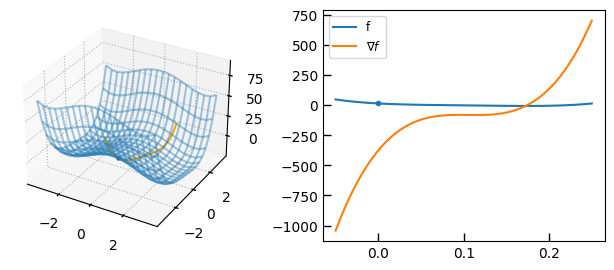

In [9]:
# Let's also try with a different starting point
x0 = np.array((0.5, -2))
d = -gradf(x0)

alpha_lim = [-0.05, 0.25]
alpha = np.linspace(*alpha_lim)

# Create the first plot
fig, ax1, ax2 = create_plot(x0, d, alpha)


# Find the minimum of the directional derivative along the line
directional_deriv = multidimensional_line_function(gradf, x0, d)
alpha0 = bisect(directional_deriv, *alpha_lim)
x1 = x0+alpha0*d
print(f"Found minimum of alpha at {alpha0:.3f}")
print(f"New point x1: {x1}")

So now we have found the minimal value of alpha along this line, and the new points. Let's overlay them on the previous figure

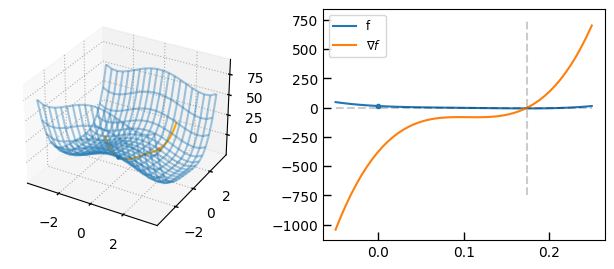

In [10]:
fig, ax1, ax2 = create_plot(x0, d, alpha)

ax1.scatter(x1[0], x1[1], f(x1))
ax2 = plot_crosshairs(ax2, [alpha0, 0], alpha_lim, [-750, 750])

And now we can do a second step!

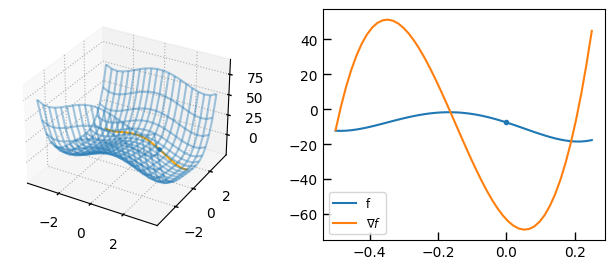

In [11]:
d = -gradf(x1)
alpha_lim = [-0.5, 0.25]
alpha = np.linspace(*alpha_lim)

# Create the first plot
fig, ax1, ax2 = create_plot(x1, d, alpha)

Here we see, that the line actually has 3 different stationary points. 2 minima, and 1 maximum. Let's find the rightmost minima and add it to the plots

Found minimum of alpha at 0.210
New point x2: [2.81443576 0.98485269]


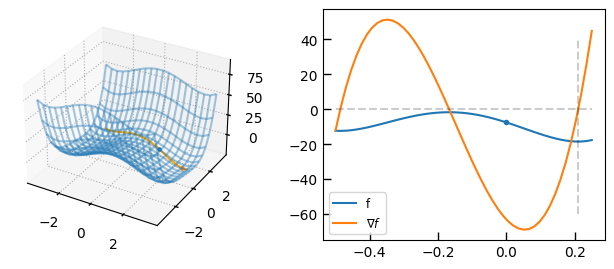

In [12]:
# Find the minimum of the directional derivative along the line
directional_deriv = multidimensional_line_function(gradf, x1, d)
alpha0 = bisect(directional_deriv, a=-0.1, b=0.25)
x2 = x1+alpha0*d
print(f"Found minimum of alpha at {alpha0:.3f}")
print(f"New point x2: {x2}")

fig, ax1, ax2 = create_plot(x1, d, alpha)
ax1.scatter(x2[0], x2[1], f(x2))
ax2 = plot_crosshairs(ax2, [alpha0, 0], alpha_lim, [-60, 40])

And so on, we could go on until we have converged. Let's overlay the three points we have found thus far on the contour plot:

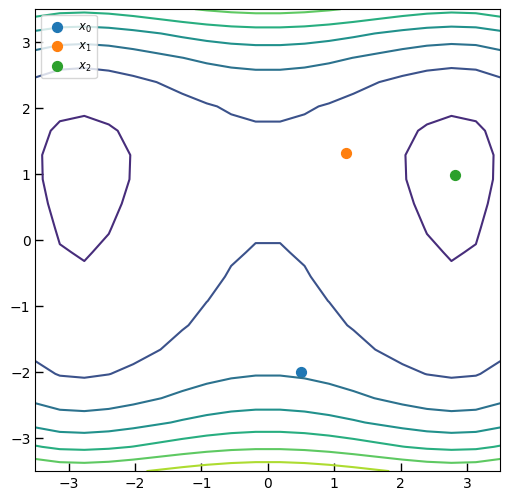

In [13]:
fig, ax = plt.subplots()
ax.contour(X[0], X[1], f(X))
ax.scatter(x0[0], x0[1], label=r'$x_0$', s=200)
ax.scatter(x1[0], x1[1], label=r'$x_1$', s=200)
ax.scatter(x2[0], x2[1], label=r'$x_2$', s=200)
ax.legend(loc='upper left');